In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data_df = pd.read_excel('Week2_challenge_data_source.xlsx')

# EDA

In [3]:
data_df.head()

,Bearer Id,Start,Start ms,End,End ms,Dur. (ms),IMSI,MSISDN/Number,IMEI,Last Location Name,...,Youtube DL (Bytes),Youtube UL (Bytes),Netflix DL (Bytes),Netflix UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Total UL (Bytes),Total DL (Bytes)
0,13114483460844900352,2019-04-04 12:01:18,770.0,2019-04-25 14:35:31,662.0,1823652.0,2.082014e+14,3.366496e+10,3.552121e+13,9164566995485190,...,15854611.0,2501332.0,8198936.0,9656251.0,278082303.0,14344150.0,171744450.0,8814393.0,36749741.0,308879636.0
1,13114483482878900224,2019-04-09 13:04:04,235.0,2019-04-25 08:15:48,606.0,1365104.0,2.082019e+14,3.368185e+10,3.579401e+13,L77566A,...,20247395.0,19111729.0,18338413.0,17227132.0,608750074.0,1170709.0,526904238.0,15055145.0,53800391.0,653384965.0
2,13114483484080500736,2019-04-09 17:42:11,1.0,2019-04-25 11:58:13,652.0,1361762.0,2.082003e+14,3.376063e+10,3.528151e+13,D42335A,...,19725661.0,14699576.0,17587794.0,6163408.0,229584621.0,395630.0,410692588.0,4215763.0,27883638.0,279807335.0
3,13114483485442799616,2019-04-10 00:31:25,486.0,2019-04-25 07:36:35,171.0,1321509.0,2.082014e+14,3.375034e+10,3.535661e+13,T21824A,...,21388122.0,15146643.0,13994646.0,1097942.0,799538153.0,10849722.0,749039933.0,12797283.0,43324218.0,846028530.0
4,13114483499480700928,2019-04-12 20:10:23,565.0,2019-04-25 10:40:32,954.0,1089009.0,2.082014e+14,3.369980e+10,3.540701e+13,D88865A,...,15259380.0,18962873.0,17124581.0,415218.0,527707248.0,3529801.0,550709500.0,13910322.0,38542814.0,569138589.0


In [4]:
#checking shape of our data
data_df.shape

(150001, 55)

In [5]:
#checking for column data types,columns with missing values
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150001 entries, 0 to 150000
Data columns (total 55 columns):
 #   Column                                    Non-Null Count   Dtype         
---  ------                                    --------------   -----         
 0   Bearer Id                                 150001 non-null  object        
 1   Start                                     150000 non-null  datetime64[ns]
 2   Start ms                                  150000 non-null  float64       
 3   End                                       150000 non-null  datetime64[ns]
 4   End ms                                    150000 non-null  float64       
 5   Dur. (ms)                                 150000 non-null  float64       
 6   IMSI                                      149431 non-null  float64       
 7   MSISDN/Number                             148935 non-null  float64       
 8   IMEI                                      149429 non-null  float64       
 9   Last Location N

In [6]:
#univariate statistical overview for our raw dataset
stats_df = pd.DataFrame(columns=['Count','Missing','Unique','Dtype','Mean','Mode','Median','Min','25th_percentile','Median','75th_percentile','Max','Std','Skew','Kurt'])
for column in data_df:
    if pd.api.types.is_numeric_dtype(data_df[column]):
        stats_df.loc[column] = [data_df[column].count(),data_df[column].isnull().sum(),data_df[column].nunique(),
                                data_df[column].dtype,data_df[column].mean(),data_df[column].mode().values[0],
                                data_df[column].median(),data_df[column].min(),data_df[column].quantile(0.25),
                                data_df[column].median(),data_df[column].quantile(0.75),data_df[column].max(),
                                data_df[column].std(),data_df[column].skew(),data_df[column].kurt()]
    else:
        stats_df.loc[column] = [data_df[column].count(),data_df[column].isnull().sum(),data_df[column].nunique(),
                                data_df[column].dtype,'-',data_df[column].mode().values[0],
                                '-','-','-','-','-','-','-','-','-']
stats_df

,Count,Missing,Unique,Dtype,Mean,Mode,Median,Min,25th_percentile,Median,75th_percentile,Max,Std,Skew,Kurt
Bearer Id,150001,0,134709,object,-,,-,-,-,-,-,-,-,-,-
Start,150000,1,111881,datetime64[ns],-,2019-04-29 07:08:38,-,-,-,-,-,-,-,-,-
Start ms,150000,1,1000,float64,499.188,341,499,0,250,499,749,999,288.612,0.000968435,-1.19745
End,150000,1,100962,datetime64[ns],-,2019-04-25 00:01:32,-,-,-,-,-,-,-,-,-
End ms,150000,1,1000,float64,498.801,872,500,0,251,500,750,999,288.098,-0.00116263,-1.19913
Dur. (ms),150000,1,89525,float64,104609,86399,86399,7142,57440.5,86399,132430,1.85934e+06,81037.6,3.95261,37.0222
IMSI,149431,570,107265,float64,2.08202e+14,2.08201e+14,2.08202e+14,2.04047e+14,2.08201e+14,2.08202e+14,2.08202e+14,2.14074e+14,2.14881e+10,41.046,55736.1
MSISDN/Number,148935,1066,106856,float64,4.18828e+10,3.36263e+10,3.36637e+10,3.3601e+10,3.36513e+10,3.36637e+10,3.36835e+10,8.82397e+14,2.44744e+12,332.156,115845
IMEI,149429,572,107270,float64,4.84745e+13,3.51823e+13,3.5722e+13,4.40015e+11,3.54607e+13,3.5722e+13,8.61197e+13,9.90012e+13,2.24164e+13,1.07147,-0.711823
Last Location Name,148848,1153,45547,object,-,D41377B,-,-,-,-,-,-,-,-,-


# Pre-Processing our data

In [7]:
#dealing with missing data

#dealing with missing values
#columns with more than 60% missing data will be dropped
data_df.drop(['Nb of sec with 125000B < Vol DL',
           'Nb of sec with 1250B < Vol UL < 6250B',
           'Nb of sec with 31250B < Vol DL < 125000B',
           'Nb of sec with 37500B < Vol UL', 
           'Nb of sec with 6250B < Vol DL < 31250B',
           'Nb of sec with 6250B < Vol UL < 37500B',
           'TCP DL Retrans. Vol (Bytes)',
           'TCP UL Retrans. Vol (Bytes)',
           'HTTP DL (Bytes)',
           'HTTP UL (Bytes)'],axis=1,inplace=True)

#The following columns are categories
#imputig with the most common class
data_df['Handset Manufacturer']=data_df['Handset Manufacturer'].fillna(data_df['Handset Manufacturer'].value_counts().index[0])
data_df['Handset Type']=data_df['Handset Type'].fillna(data_df['Handset Type'].value_counts().index[0])
data_df['Last Location Name']=data_df['Last Location Name'].fillna(data_df['Last Location Name'].value_counts().index[0])


data_df.isnull().sum()

Bearer Id                             0
Start                                 1
Start ms                              1
End                                   1
End ms                                1
Dur. (ms)                             1
IMSI                                570
MSISDN/Number                      1066
IMEI                                572
Last Location Name                    0
Avg RTT DL (ms)                   27829
Avg RTT UL (ms)                   27812
Avg Bearer TP DL (kbps)               1
Avg Bearer TP UL (kbps)               1
DL TP < 50 Kbps (%)                 754
50 Kbps < DL TP < 250 Kbps (%)      754
250 Kbps < DL TP < 1 Mbps (%)       754
DL TP > 1 Mbps (%)                  754
UL TP < 10 Kbps (%)                 792
10 Kbps < UL TP < 50 Kbps (%)       792
50 Kbps < UL TP < 300 Kbps (%)      792
UL TP > 300 Kbps (%)                792
Activity Duration DL (ms)             1
Activity Duration UL (ms)             1
Dur. (ms).1                           1


In [8]:
#convert text data to lowercase
#this allows us to have standard data
data_df['Handset Manufacturer']=data_df['Handset Manufacturer'].str.lower()
data_df['Handset Type'] = data_df['Handset Type'].str.lower()
data_df[['Handset Manufacturer','Handset Type']].head()

,Handset Manufacturer,Handset Type
0,samsung,samsung galaxy a5 sm-a520f
1,samsung,samsung galaxy j5 (sm-j530)
2,samsung,samsung galaxy a8 (2018)
3,undefined,undefined
4,samsung,samsung sm-g390f


In [9]:
#dropping the rows with missing values in the following sected columns
#these columns only had a single missing value
data_df.dropna(subset=['Start','Start ms','End','End ms','Dur. (ms)',
                    'Avg Bearer TP DL (kbps)','Avg Bearer TP UL (kbps)',
                    'Activity Duration DL (ms)','Activity Duration UL (ms)',
                    'Dur. (ms).1','Total UL (Bytes)','Total DL (Bytes)',
                    'IMSI','MSISDN/Number','IMEI'],inplace=True)

#replacing all tthe remaining missing values with their mean
data_df.fillna(data_df.mean(),inplace = True)
data_df.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [10]:
data_df.shape

(148935, 45)

In [11]:
#some columns seem to be categories but are of numeric type
#we change them to categorical
data_df['IMSI'] = data_df['IMSI'].astype(str)
data_df['MSISDN/Number'] = data_df['MSISDN/Number'].astype(str)
data_df['IMEI'] = data_df['IMEI'].astype(str)
data_df['Last Location Name'] = data_df['Last Location Name'].astype(str)

data_df.isnull().sum()

Bearer Id                         0
Start                             0
Start ms                          0
End                               0
End ms                            0
Dur. (ms)                         0
IMSI                              0
MSISDN/Number                     0
IMEI                              0
Last Location Name                0
Avg RTT DL (ms)                   0
Avg RTT UL (ms)                   0
Avg Bearer TP DL (kbps)           0
Avg Bearer TP UL (kbps)           0
DL TP < 50 Kbps (%)               0
50 Kbps < DL TP < 250 Kbps (%)    0
250 Kbps < DL TP < 1 Mbps (%)     0
DL TP > 1 Mbps (%)                0
UL TP < 10 Kbps (%)               0
10 Kbps < UL TP < 50 Kbps (%)     0
50 Kbps < UL TP < 300 Kbps (%)    0
UL TP > 300 Kbps (%)              0
Activity Duration DL (ms)         0
Activity Duration UL (ms)         0
Dur. (ms).1                       0
Handset Manufacturer              0
Handset Type                      0
Nb of sec with Vol DL < 6250

In [12]:
#univariate statistical overview for our raw dataset
stats_df2 = pd.DataFrame(columns=['Count','Missing','Unique','Dtype','Mean','Mode','Median','Min','25th_percentile','Median','75th_percentile','Max','Std','Skew','Kurt'])
for column in data_df:
    if pd.api.types.is_numeric_dtype(data_df[column]):
        stats_df2.loc[column] = [data_df[column].count(),data_df[column].isnull().sum(),data_df[column].nunique(),
                                data_df[column].dtype,data_df[column].mean(),data_df[column].mode().values[0],
                                data_df[column].median(),data_df[column].min(),data_df[column].quantile(0.25),
                                data_df[column].median(),data_df[column].quantile(0.75),data_df[column].max(),
                                data_df[column].std(),data_df[column].skew(),data_df[column].kurt()]
    else:
        stats_df2.loc[column] = [data_df[column].count(),data_df[column].isnull().sum(),data_df[column].nunique(),
                                data_df[column].dtype,'-',data_df[column].mode().values[0],
                                '-','-','-','-','-','-','-','-','-']
stats_df2

,Count,Missing,Unique,Dtype,Mean,Mode,Median,Min,25th_percentile,Median,75th_percentile,Max,Std,Skew,Kurt
Bearer Id,148935,0,134256,object,-,,-,-,-,-,-,-,-,-,-
Start,148935,0,111354,datetime64[ns],-,2019-04-29 07:08:38,-,-,-,-,-,-,-,-,-
Start ms,148935,0,1000,float64,499.247,341,499,0,250,499,749,999,288.556,0.000663921,-1.19711
End,148935,0,100513,datetime64[ns],-,2019-04-25 00:01:32,-,-,-,-,-,-,-,-,-
End ms,148935,0,1000,float64,498.675,872,500,0,251,500,750,999,288.089,-0.000750506,-1.19909
Dur. (ms),148935,0,89024,float64,104870,86399,86399,7142,57883.5,86399,132700,1.85934e+06,81063.4,3.96394,37.1774
IMSI,148935,0,106855,object,-,208201402778052.0,-,-,-,-,-,-,-,-,-
MSISDN/Number,148935,0,106856,object,-,33626320676.0,-,-,-,-,-,-,-,-,-
IMEI,148935,0,106862,object,-,35182310355840.0,-,-,-,-,-,-,-,-,-
Last Location Name,148935,0,45379,object,-,D41377B,-,-,-,-,-,-,-,-,-


In [13]:
outliers_count_df = pd.DataFrame(columns=['Outlier_Count','skewness'])
for column in data_df:
    if pd.api.types.is_numeric_dtype(data_df[column]):
        Q1 = data_df[column].quantile(0.25)
        Q3 = data_df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_whisker = Q1-1.5*IQR
        upper_whisker = Q3+1.5*IQR
        outliers_count_df.loc[column] = [((data_df[column]<lower_whisker) | (data_df[column] > upper_whisker)).sum(),data_df[column].skew()]
outliers_count_df

,Outlier_Count,skewness
Start ms,0.0,0.000664
End ms,0.0,-0.000751
Dur. (ms),7149.0,3.963937
Avg RTT DL (ms),7698.0,71.463598
Avg RTT UL (ms),8912.0,31.644151
Avg Bearer TP DL (kbps),13202.0,2.590258
Avg Bearer TP UL (kbps),21417.0,4.500632
DL TP < 50 Kbps (%),18185.0,-2.306316
50 Kbps < DL TP < 250 Kbps (%),15053.0,3.285917
250 Kbps < DL TP < 1 Mbps (%),29472.0,4.586465


In [15]:
import numpy as np
outliers_count_df = pd.DataFrame(columns=['Outlier_Count','skewness'])
for column in data_df:
    if pd.api.types.is_numeric_dtype(data_df[column]):
        data_df[column] = data_df[column].map(lambda i: np.log(i) if i > 0 else 0) 
        Q1 = data_df[column].quantile(0.25)
        Q3 = data_df[column].quantile(0.75)
        IQR = Q3-Q1
        lower_whisker = Q1-1.5*IQR
        upper_whisker = Q3+1.5*IQR
        data_df[column] = np.where(((data_df[column]<lower_whisker) | (data_df[column] > upper_whisker)), data_df[column].median(), data_df[column])
        outliers_count_df.loc[column] = [((data_df[column]<lower_whisker) | (data_df[column] > upper_whisker)).sum(),data_df[column].skew()]
outliers_count_df 

,Outlier_Count,skewness
Start ms,0.0,-1.195129
End ms,0.0,-1.065171
Dur. (ms),0.0,-0.390507
Avg RTT DL (ms),0.0,0.475900
Avg RTT UL (ms),0.0,-0.069521
Avg Bearer TP DL (kbps),0.0,0.363192
Avg Bearer TP UL (kbps),0.0,0.550644
DL TP < 50 Kbps (%),0.0,-2.209622
50 Kbps < DL TP < 250 Kbps (%),0.0,1.273322
250 Kbps < DL TP < 1 Mbps (%),0.0,0.000000


In [16]:
#statistics of our cleaned and outlier free data
stats_df2 = pd.DataFrame(columns=['Count','Missing','Unique','Dtype','Mean','Mode','Median','Min','25th_percentile','Median','75th_percentile','Max','Std','Skew','Kurt'])
for column in data_df:
    if pd.api.types.is_numeric_dtype(data_df[column]):
        stats_df2.loc[column] = [data_df[column].count(),data_df[column].isnull().sum(),data_df[column].nunique(),
                                data_df[column].dtype,data_df[column].mean(),data_df[column].mode().values[0],
                                data_df[column].median(),data_df[column].min(),data_df[column].quantile(0.25),
                                data_df[column].median(),data_df[column].quantile(0.75),data_df[column].max(),
                                data_df[column].std(),data_df[column].skew(),data_df[column].kurt()]
    else:
        stats_df2.loc[column] = [data_df[column].count(),data_df[column].isnull().sum(),data_df[column].nunique(),
                                data_df[column].dtype,'-',data_df[column].mode().values[0],
                                '-','-','-','-','-','-','-','-','-']
stats_df2

,Count,Missing,Unique,Dtype,Mean,Mode,Median,Min,25th_percentile,Median,75th_percentile,Max,Std,Skew,Kurt
Bearer Id,148935,0,134256,object,-,,-,-,-,-,-,-,-,-,-
Start,148935,0,111354,datetime64[ns],-,2019-04-29 07:08:38,-,-,-,-,-,-,-,-,-
Start ms,148935,0,932,float64,1.80388,1.82658,1.82658,1.43972,1.75129,1.82658,1.8899,1.9325,0.111498,-1.19513,0.83494
End,148935,0,100513,datetime64[ns],-,2019-04-25 00:01:32,-,-,-,-,-,-,-,-,-
End ms,148935,0,951,float64,6.06616,6.21461,6.21461,3.89182,5.69373,6.21461,6.62007,6.90675,0.699219,-1.06517,0.47057
Dur. (ms),148935,0,84711,float64,11.3671,11.3667,11.3667,9.72173,11.0905,11.3667,11.7816,13.0397,0.626418,-0.390507,0.133034
IMSI,148935,0,106855,object,-,208201402778052.0,-,-,-,-,-,-,-,-,-
MSISDN/Number,148935,0,106856,object,-,33626320676.0,-,-,-,-,-,-,-,-,-
IMEI,148935,0,106862,object,-,35182310355840.0,-,-,-,-,-,-,-,-,-
Last Location Name,148935,0,45379,object,-,D41377B,-,-,-,-,-,-,-,-,-


# Feature Exploration,Selection & Creation

<AxesSubplot:>

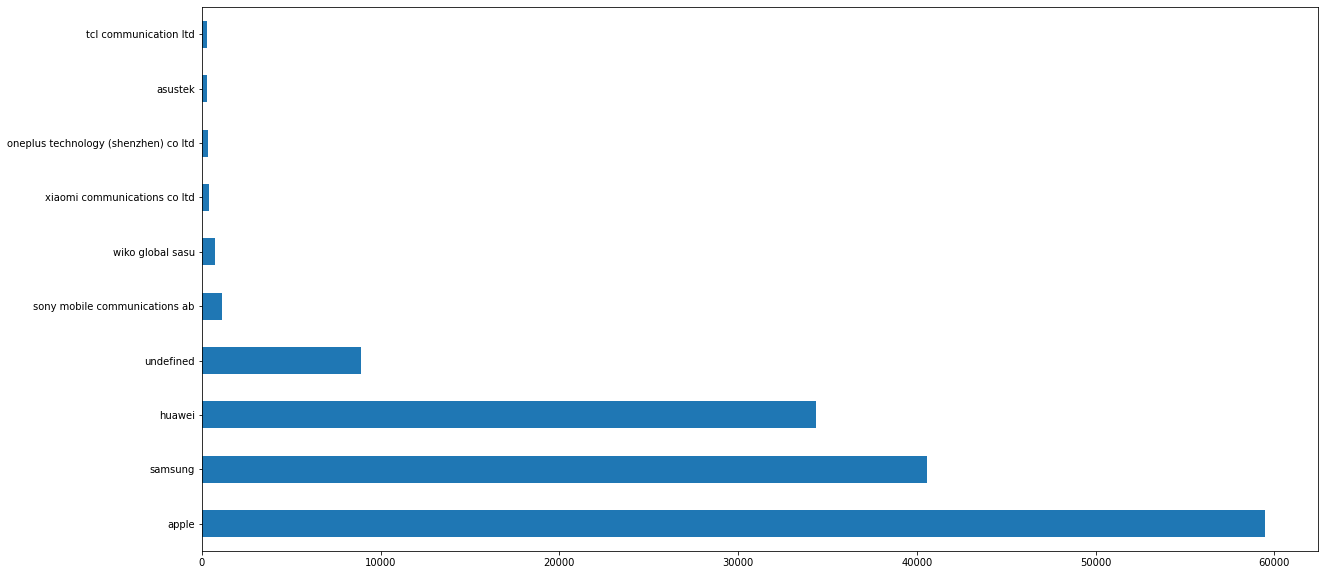

In [17]:
#Understanding hanset type,and manufactures used by customers
#Top 10 handset Manufacturers
data_df['Handset Manufacturer'].value_counts().head(10).plot(kind='barh',figsize=(20,10))

<AxesSubplot:>

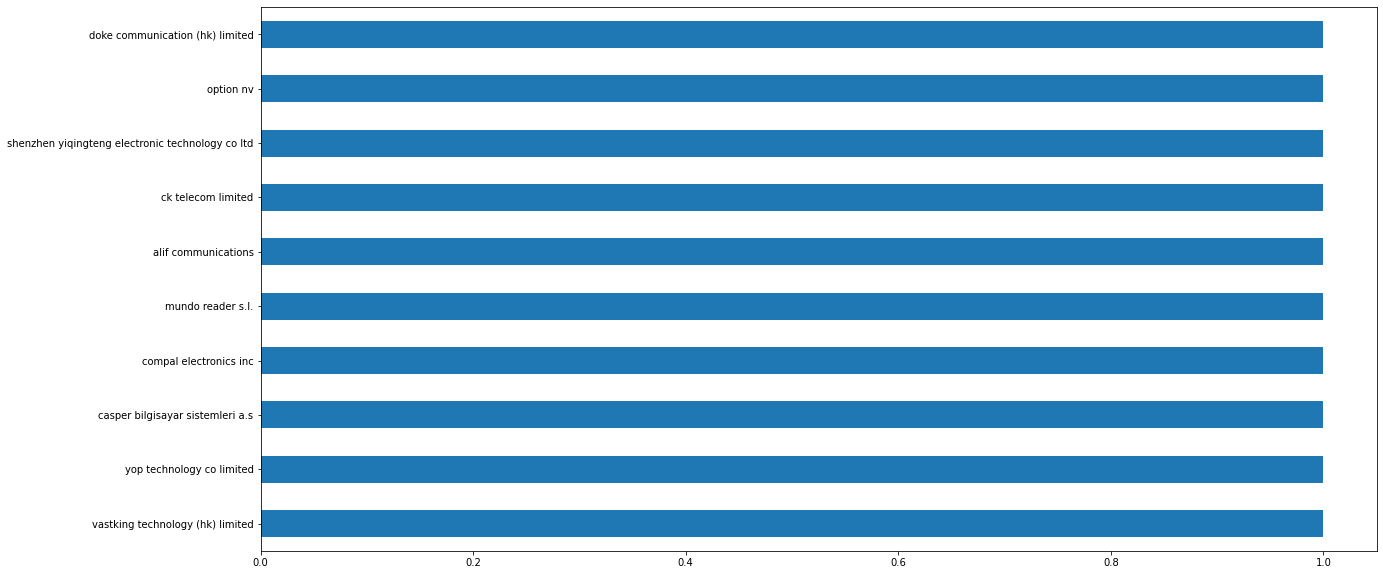

In [19]:
#least used handset manufacturers
#Top 10 handset types
data_df['Handset Manufacturer'].value_counts().tail(10).plot(kind='barh',figsize=(20,10))

<AxesSubplot:>

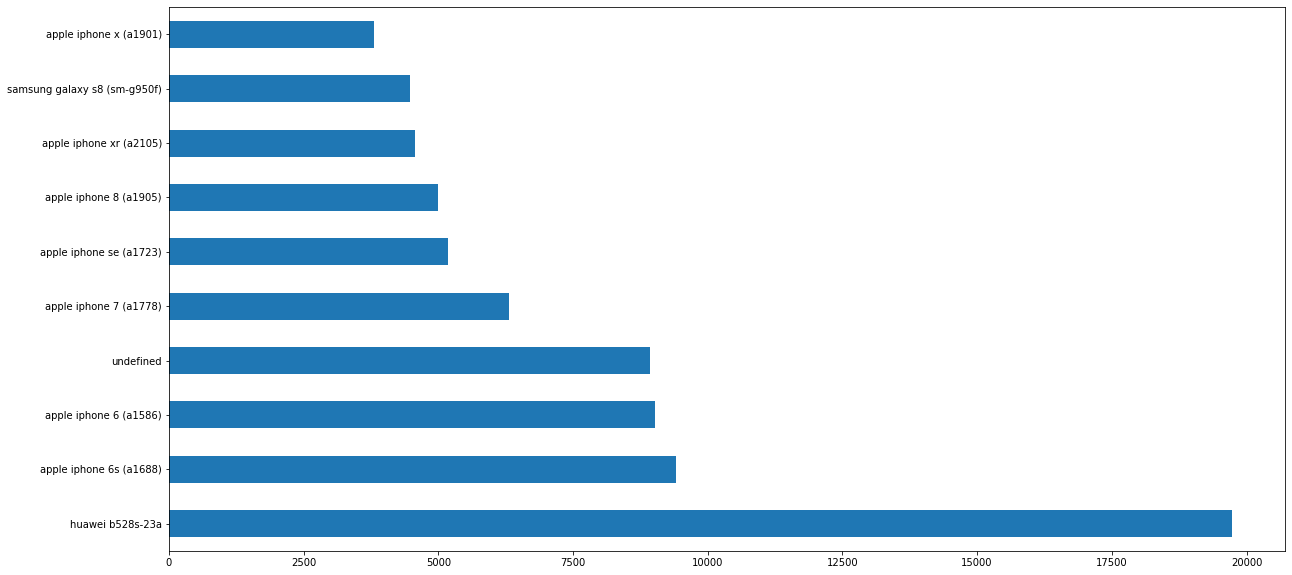

In [20]:
#top 10 handset types used
#Top 10 handset types
data_df['Handset Type'].value_counts().head(10).plot(kind='barh',figsize=(20,10))

<AxesSubplot:>

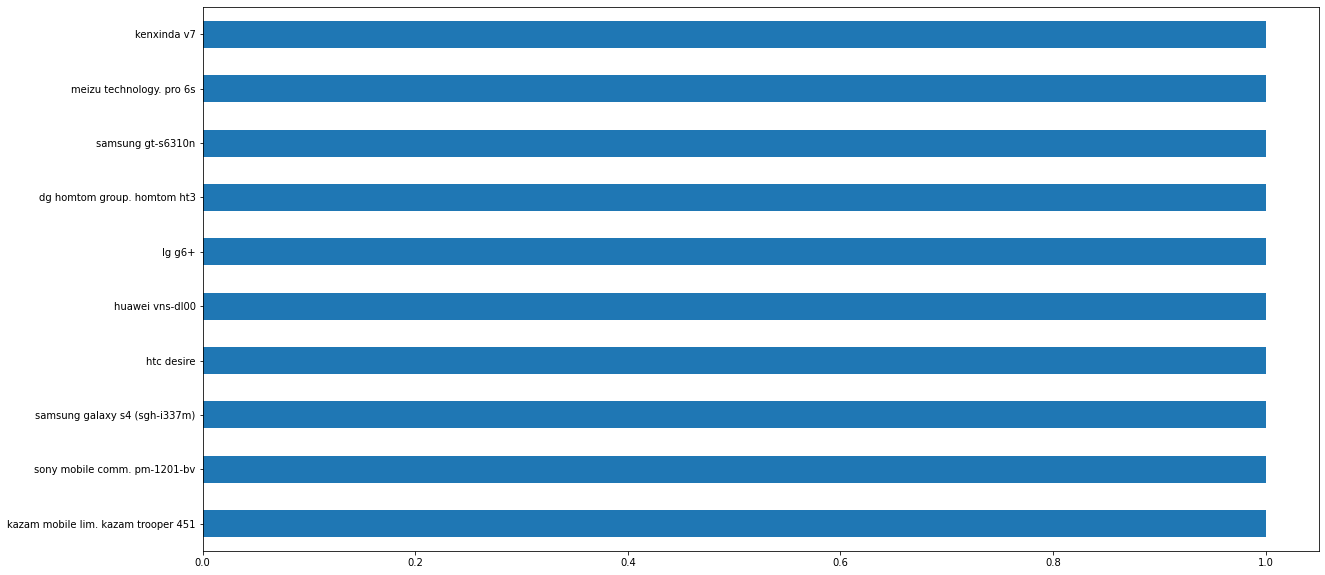

In [21]:
#Least 10 handset types
data_df['Handset Type'].value_counts().tail(10).plot(kind='barh',figsize=(20,10))

In [25]:
#top handset types per manufacturer
top3 = data_df.groupby(['Handset Manufacturer','Handset Type']).size().reset_index(name='Count').sort_values(['Handset Manufacturer','Count'],ascending=[1,0]).groupby('Handset Type').head(3)

In [26]:
top3.head()

,Handset Manufacturer,Handset Type,Count
6,a-link telecom international co limited,a-link telecom i. cubot x18 plus,2
0,a-link telecom international co limited,a-link telecom i. cubot a5,1
1,a-link telecom international co limited,a-link telecom i. cubot note plus,1
2,a-link telecom international co limited,a-link telecom i. cubot note s,1
3,a-link telecom international co limited,a-link telecom i. cubot nova,1


# User Behaviour on the Network

In [32]:
#getting total number of sessions per user
user_session_count = data_df.groupby("MSISDN/Number")["Bearer Id"].count()

#getting sum of duration a user has ever spent on the network
user_duration_total = data_df.groupby("MSISDN/Number")["Dur. (ms)"].sum()

#select columns that will enable us understand data consumption by a user
user_behaviour_columns = data_df[['MSISDN/Number','Total UL (Bytes)','Total DL (Bytes)','Social Media DL (Bytes)',
              'Social Media UL (Bytes)','Google DL (Bytes)','Google UL (Bytes)','Email DL (Bytes)',
              'Email UL (Bytes)','Youtube DL (Bytes)','Youtube UL (Bytes)','Netflix DL (Bytes)',
              'Netflix UL (Bytes)','Gaming DL (Bytes)','Gaming UL (Bytes)','Other DL (Bytes)','Other UL (Bytes)']]

#getting total a amount of data (upload and download) used per application per session by a user
user_behaviour_columns['Total_Data'] = user_behaviour_columns["Total UL (Bytes)"]+user_behaviour_columns["Total DL (Bytes)"]
user_behaviour_columns['Google_Data'] = user_behaviour_columns['Google UL (Bytes)'] + user_behaviour_columns['Google DL (Bytes)']
user_behaviour_columns['Email_Data'] = user_behaviour_columns['Email UL (Bytes)'] + user_behaviour_columns['Email DL (Bytes)']
user_behaviour_columns['Social_Media_Data'] = user_behaviour_columns['Social Media UL (Bytes)'] + user_behaviour_columns['Social Media DL (Bytes)']
user_behaviour_columns['Youtube_Data'] = user_behaviour_columns['Youtube UL (Bytes)'] + user_behaviour_columns['Youtube DL (Bytes)']
user_behaviour_columns['Netflix_Data'] = user_behaviour_columns['Netflix UL (Bytes)'] + user_behaviour_columns['Netflix DL (Bytes)']
user_behaviour_columns['Gaming_Data'] = user_behaviour_columns['Gaming UL (Bytes)'] + user_behaviour_columns['Gaming DL (Bytes)']
user_behaviour_columns['Other_Data'] = user_behaviour_columns['Other UL (Bytes)'] + user_behaviour_columns['Other DL (Bytes)']

duration_data = pd.merge(user_duration_total,user_behaviour_columns,on="MSISDN/Number")
user_data = pd.merge(user_session_count,duration_data,on="MSISDN/Number")
user_data.rename(columns = {"MSISDN/Number":"User_Id","Bearer Id":"Sessions_Count","Dur. (ms)":"Session_Duration"},inplace=True)
user_data.describe()

<ipython-input-32-a6340e3955da>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_behaviour_columns['Total_Data'] = user_behaviour_columns["Total UL (Bytes)"]+user_behaviour_columns["Total DL (Bytes)"]
<ipython-input-32-a6340e3955da>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_behaviour_columns['Google_Data'] = user_behaviour_columns['Google UL (Bytes)'] + user_behaviour_columns['Google DL (Bytes)']
<ipython-input-32-a6340e3955da>:16: SettingWithCopyWarning: 
A value is trying to be set on a

,Sessions_Count,Session_Duration,Total UL (Bytes),Total DL (Bytes),Social Media DL (Bytes),Social Media UL (Bytes),Google DL (Bytes),Google UL (Bytes),Email DL (Bytes),Email UL (Bytes),...,Other DL (Bytes),Other UL (Bytes),Total_Data,Google_Data,Email_Data,Social_Media_Data,Youtube_Data,Netflix_Data,Gaming_Data,Other_Data
count,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,...,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000,148935.000000
mean,1.859905,21.218531,17.510128,19.777709,14.255551,10.254529,15.420220,14.388366,14.251664,12.909000,...,19.713644,15.784140,37.287837,29.808585,27.160665,24.510080,32.193997,32.186059,35.496288,35.497783
std,1.300876,15.266033,0.269140,0.670114,0.696267,0.699666,0.695851,0.701875,0.701467,0.696947,...,0.696613,0.694393,0.721361,0.988019,0.989242,0.987365,0.984625,0.992370,0.989279,0.983789
min,1.000000,9.721726,16.734689,17.798067,12.062456,8.059276,13.230322,12.183254,12.047534,10.712460,...,17.513275,13.596070,34.575320,25.432963,22.787179,20.193616,27.872218,27.868408,31.141221,31.157709
25%,1.000000,11.366731,17.340403,19.394424,13.885695,9.881574,15.049949,14.016671,13.883481,12.537012,...,19.340832,15.415066,36.865042,29.183083,26.533133,23.882223,31.568970,31.549691,34.864926,34.871684
50%,1.000000,12.361336,17.532516,19.937720,14.399828,10.401653,15.567730,14.535241,14.399727,13.052707,...,19.860211,15.927672,37.434749,29.981827,27.335005,24.683365,32.367208,32.359794,35.664720,35.670791
75%,2.000000,23.453893,17.707993,20.316286,14.806866,10.806227,15.970111,14.943145,14.804917,13.459468,...,20.263862,16.331758,37.834169,30.576882,27.930089,25.279044,32.960039,32.959425,36.267440,36.261795
max,18.000000,214.746935,18.176458,20.621199,15.092566,11.095438,16.254620,15.231693,15.092589,13.749817,...,20.553002,16.622429,38.730925,31.480719,28.840018,26.185739,33.865731,33.866037,37.171316,37.169507


In [35]:
user_data.columns

Index(['User_Id', 'Sessions_Count', 'Session_Duration', 'Total UL (Bytes)',
       'Total DL (Bytes)', 'Social Media DL (Bytes)',
       'Social Media UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Youtube DL (Bytes)',
       'Youtube UL (Bytes)', 'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
       'Gaming DL (Bytes)', 'Gaming UL (Bytes)', 'Other DL (Bytes)',
       'Other UL (Bytes)', 'Total_Data', 'Google_Data', 'Email_Data',
       'Social_Media_Data', 'Youtube_Data', 'Netflix_Data', 'Gaming_Data',
       'Other_Data'],
      dtype='object')

In [36]:
#Univariate statistics of our user behaviour data
stats_df2 = pd.DataFrame(columns=['Count','Missing','Unique','Dtype','Mean','Mode','Median','Min','25th_percentile','Median','75th_percentile','Max','Std','Skew','Kurt'])
for column in user_data:
    if pd.api.types.is_numeric_dtype(user_data[column]):
        stats_df2.loc[column] = [user_data[column].count(),user_data[column].isnull().sum(),user_data[column].nunique(),
                                user_data[column].dtype,user_data[column].mean(),user_data[column].mode().values[0],
                                user_data[column].median(),user_data[column].min(),user_data[column].quantile(0.25),
                                user_data[column].median(),user_data[column].quantile(0.75),user_data[column].max(),
                                user_data[column].std(),user_data[column].skew(),user_data[column].kurt()]
    else:
        stats_df2.loc[column] = [user_data[column].count(),user_data[column].isnull().sum(),user_data[column].nunique(),
                                user_data[column].dtype,'-',user_data[column].mode().values[0],
                                '-','-','-','-','-','-','-','-','-']
stats_df2

,Count,Missing,Unique,Dtype,Mean,Mode,Median,Min,25th_percentile,Median,75th_percentile,Max,Std,Skew,Kurt
User_Id,148935,0,106856,object,-,33626320676.0,-,-,-,-,-,-,-,-,-
Sessions_Count,148935,0,17,int64,1.85991,1,1,1,1,1,2,18,1.30088,2.94255,16.9041
Session_Duration,148935,0,77869,float64,21.2185,11.3667,12.3613,9.72173,11.3667,12.3613,23.4539,214.747,15.266,3.12361,18.7916
Total UL (Bytes),148935,0,145598,float64,17.5101,17.5325,17.5325,16.7347,17.3404,17.5325,17.708,18.1765,0.26914,-0.46899,-0.184049
Total DL (Bytes),148935,0,145153,float64,19.7777,19.9377,19.9377,17.7981,19.3944,19.9377,20.3163,20.6212,0.670114,-0.959548,0.125742
Social Media DL (Bytes),148935,0,138777,float64,14.2556,14.3998,14.3998,12.0625,13.8857,14.3998,14.8069,15.0926,0.696267,-1.05449,0.443621
Social Media UL (Bytes),148935,0,56154,float64,10.2545,10.4017,10.4017,8.05928,9.88157,10.4017,10.8062,11.0954,0.699666,-1.0539,0.431243
Google DL (Bytes),148935,0,140871,float64,15.4202,15.5677,15.5677,13.2303,15.0499,15.5677,15.9701,16.2546,0.695851,-1.06043,0.454214
Google UL (Bytes),148935,0,139265,float64,14.3884,14.5352,14.5352,12.1833,14.0167,14.5352,14.9431,15.2317,0.701875,-1.05856,0.448117
Email DL (Bytes),148935,0,138872,float64,14.2517,14.3997,14.3997,12.0475,13.8835,14.3997,14.8049,15.0926,0.701467,-1.0659,0.465228


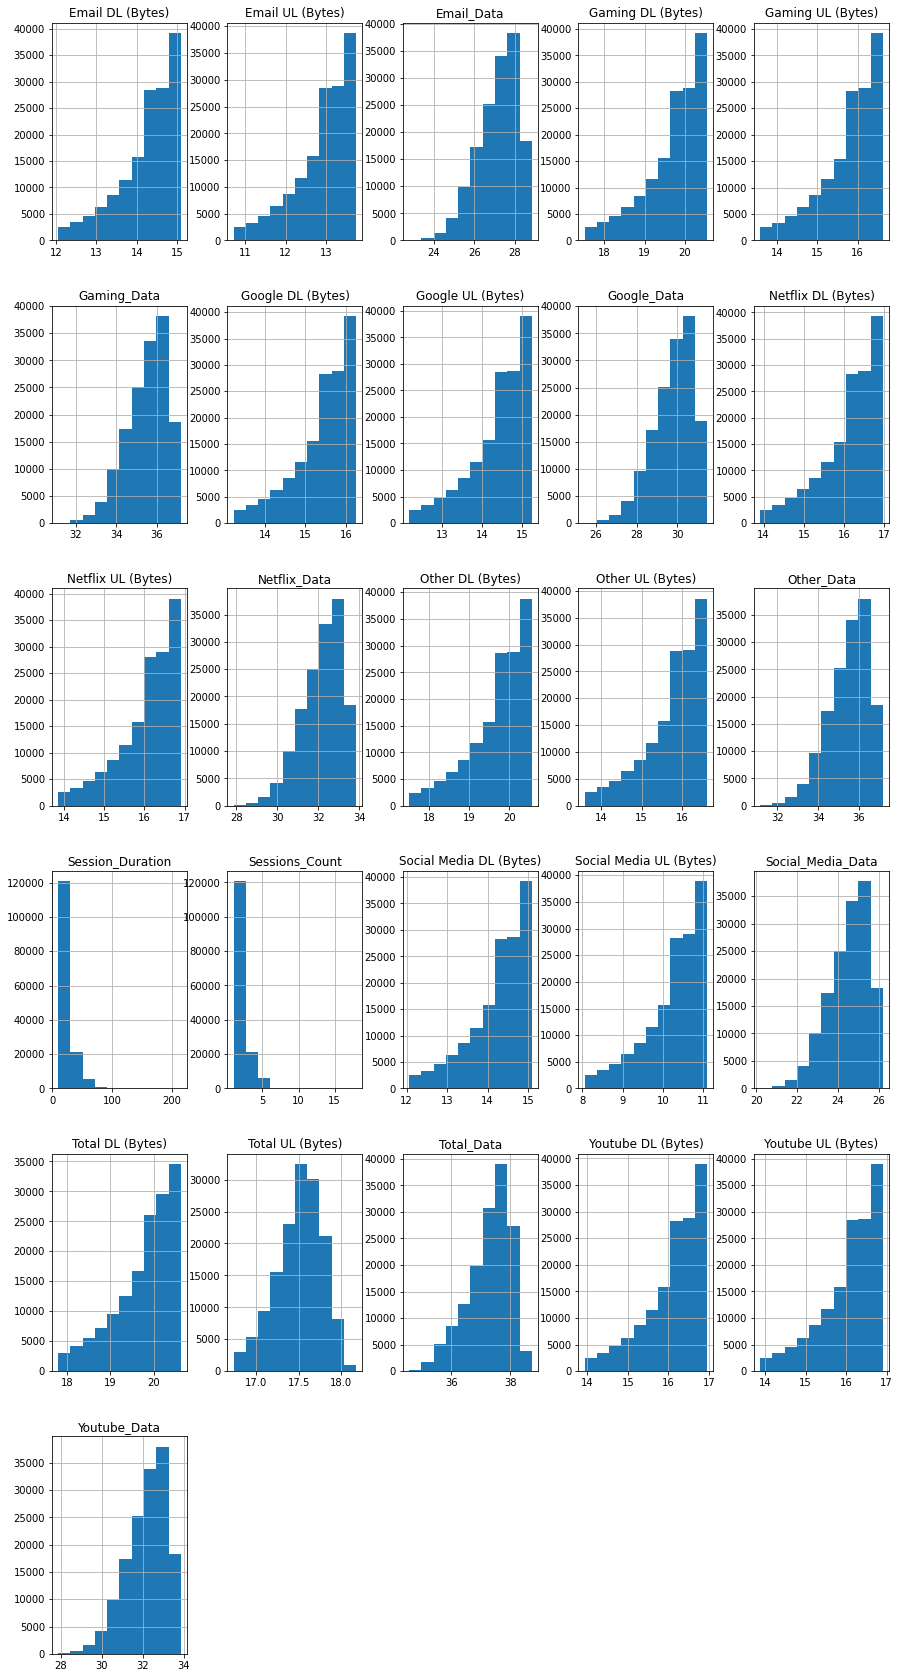

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = [15, 30]
hist = user_data.drop('User_Id',axis=1).hist(bins=10)